# Hand Writtten Digits Classifying

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
train_labels[1]

0

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

In [8]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

#    The network architecture

In [9]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

# The compilation step

In [10]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Preparing the image data

In [11]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255 
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Preparing the labels

In [12]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Ready to train the Network

In [13]:
network.fit(train_images, train_labels, epochs=6, batch_size=324)

Epoch 1/6
60000/60000 [==============================] - 14s 236us/step - loss: 0.3291 - accuracy: 0.9061
Epoch 2/6
60000/60000 [==============================] - 4s 74us/step - loss: 0.1392 - accuracy: 0.9593
Epoch 3/6
60000/60000 [==============================] - 4s 75us/step - loss: 0.0939 - accuracy: 0.9721
Epoch 4/6
60000/60000 [==============================] - 5s 77us/step - loss: 0.0684 - accuracy: 0.9799 0s - loss: 0.0688 - accuracy: 
Epoch 5/6
60000/60000 [==============================] - 5s 75us/step - loss: 0.0517 - accuracy: 0.9849
Epoch 6/6
60000/60000 [==============================] - 4s 74us/step - loss: 0.0408 - accuracy: 0.9878


# Check the Model on Test Data

In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 81us/step


In [15]:
print( ' test_acc:', test_acc,'\n','test_loss',test_loss)

 test_acc: 0.9711999893188477 
 test_loss 0.09518602437097579


In [17]:
network.predict(test_images)[0]

array([7.1436574e-08, 4.6967057e-09, 1.1938820e-06, 1.7559367e-05,
       8.3897561e-10, 1.5185036e-07, 2.3165133e-12, 9.9997950e-01,
       2.0588661e-07, 1.3603869e-06], dtype=float32)

In [18]:
from tensorflow.keras.datasets import mnist

In [19]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [20]:
train_images.ndim

3

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
train_images.dtype

dtype('uint8')

# Displaying the Digit

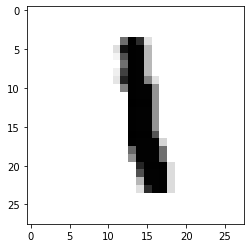

In [40]:
digit = train_images[6]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [41]:
train_labels[6]

1